<a href="https://colab.research.google.com/github/Kader43/Apprentissage-Statistique/blob/main/FNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A first look at a neural network
## Application to the MNIST classification problem

Nous allons maintenant examiner un premier exemple concret de réseau de neurones, utilisant la bibliothèque Python Keras pour apprendre à classifier des chiffres manuscrits.

À moins d'avoir déjà une expérience avec Keras ou des bibliothèques similaires, vous ne comprendrez pas immédiatement tous les aspects de ce premier exemple. Vous n'avez probablement même pas encore installé Keras. Ne vous inquiétez pas, c'est tout à fait normal.

Le problème que nous cherchons à résoudre ici est la classification d'images en niveaux de gris de chiffres manuscrits (28 pixels par 28 pixels) dans leurs 10 catégories (de 0 à 9). Le jeu de données que nous utiliserons est le jeu de données MNIST, un jeu de données classique dans le domaine de l'apprentissage automatique, qui existe depuis presque aussi longtemps que le domaine lui-même et qui a fait l'objet de nombreuses études. Il s'agit d'un ensemble de 60 000 images d'entraînement et de 10 000 images de test, rassemblées par le National Institute of Standards and Technology (le NIST dans MNIST) dans les années 1980. On peut considérer la résolution de MNIST comme le « Hello World » de l'apprentissage profond : c'est ce que l'on fait pour vérifier que ses algorithmes fonctionnent comme prévu. En devenant un expert en apprentissage automatique, vous rencontrerez fréquemment MNIST dans les articles scientifiques, les billets de blog, etc.

![Exemples MNIST](data/MNISTsample.png)

In [13]:
from tensorflow import keras


Le jeu de données MNIST est préchargé dans Keras, sous la forme d'un ensemble de quatre tableaux Numpy :

In [14]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Les ensembles `train_images` et `train_labels` constituent l'ensemble d'entraînement, c'est-à-dire les données sur lesquelles le modèle apprendra. Le modèle sera ensuite testé sur l'ensemble de test, composé des ensembles `test_images` et `test_labels`. Nos images sont encodées sous forme de tableaux NumPy, et les étiquettes sont simplement un tableau de chiffres, allant de 0 à 9. Il existe une correspondance biunivoque entre les images et les étiquettes.

Examinons maintenant les données d'entraînement :

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
len(train_labels)

60000

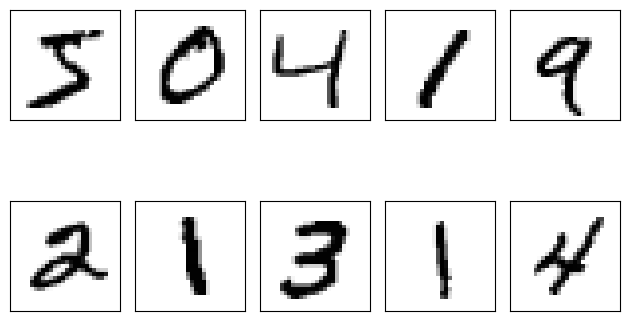

[5 0 4 1 9 2 1 3 1 4]


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the first 10 samples from the training set
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(train_images[i,:,:],cmap=plt.cm.gray_r, interpolation='nearest')


ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

print(train_labels[:10])

In [18]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Examinons les données de test :

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

In [21]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Notre flux de travail sera le flux classique : dans un premier temps, nous présenterons au réseau de neurones les données d’entraînement, à savoir train_images et train_labels.
Le réseau apprendra alors à associer les images à leurs étiquettes correspondantes.
Enfin, nous demanderons au réseau de produire des prédictions pour test_images, et nous vérifierons si ces prédictions correspondent aux étiquettes contenues dans test_labels.

Construisons maintenant notre réseau à l’aide de Keras — la documentation complète de Keras est disponible [here](https://keras.io).

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Le bloc de construction fondamental des réseaux de neurones est la « couche » (layer), un module de traitement de données que l’on peut concevoir comme un « filtre » appliqué aux données.
Des données entrent et ressortent sous une forme plus utile. Plus précisément, les couches extraient des représentations à partir des données qui leur sont fournies — idéalement des représentations plus pertinentes pour le problème considéré.

L’essentiel du deep learning consiste à enchaîner des couches simples, qui mettent en œuvre une forme de « distillation progressive des données ».
Un modèle de deep learning est comparable à un tamis de traitement des données, constitué d’une succession de filtres de plus en plus raffinés — les couches.

Une couche Dense signifie qu’il s’agit d’une couche de neurones densément connectée (également appelée entièrement connectée ou fully connected).

In [24]:
network.compile(optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Avant l’entraînement, nous allons prétraiter nos données en les remodelant afin qu’elles correspondent à la forme attendue par le réseau, et en les mettant à l’échelle de sorte que toutes les valeurs soient comprises dans l’intervalle [0, 1].

Auparavant, par exemple, les images d’entraînement étaient stockées dans un tableau de forme (60000, 28, 28), de type uint8, avec des valeurs comprises dans l’intervalle [0, 255].
Nous les transformons en un tableau de type float32, de forme (60000, 28 * 28), contenant des valeurs comprises entre 0 et 1

In [25]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/ 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Nous devons également encoder catégoriquement les étiquettes :

* Élément de liste
* Élément de liste


In [26]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Nous sommes maintenant prêts à entraîner notre réseau, ce qui, dans Keras, se fait via un appel à la méthode `fit` du réseau :

nous « ajustons » le modèle à ses données d’entraînement.

In [27]:
network.fit(train_images, train_labels, epochs=8, batch_size=128)

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8792 - loss: 0.4278
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9694 - loss: 0.1065
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9811 - loss: 0.0638
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9881 - loss: 0.0441
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9927 - loss: 0.0273
Epoch 6/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9936 - loss: 0.0226
Epoch 7/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9966 - loss: 0.0150
Epoch 8/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9962 - loss: 0.0142


Deux grandeurs sont affichées pendant l'entraînement : la perte du réseau sur les données d'entraînement et sa précision sur ces mêmes données.

Nous atteignons rapidement une précision de 0,989 (soit 98,9 %) sur les données d'entraînement. Vérifions maintenant que notre modèle fonctionne également bien sur l'ensemble de test.

In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.0822


In [29]:
print('test_acc:', test_acc)

test_acc: 0.9800999760627747


Notre précision sur l'ensemble de test s'avère être de 98,1 %, ce qui est nettement inférieur à la précision sur l'ensemble d'entraînement.

Cet écart entre la précision d'entraînement et la précision de test est un exemple de « surapprentissage »,

le fait que les modèles d'apprentissage automatique ont tendance à être moins performants sur de nouvelles données que sur leurs données d'entraînement.

Ceci conclut notre tout premier exemple : vous venez de voir comment construire et entraîner un réseau de neurones pour classifier des chiffres manuscrits,

en moins de 20 lignes de code Python.

## Conclusions

Voici les points à retenir de cet exemple :

* Si vous cherchez à classer des points de données en N classes, votre réseau doit se terminer par une couche `Dense` de taille N.

* Dans un problème de classification multiclasse à étiquette unique, votre réseau doit se terminer par une fonction d'activation `softmax`, afin de produire une
distribution de probabilité sur les N classes de sortie.

* L'entropie croisée catégorielle est presque toujours la fonction de perte à utiliser pour ce type de problèmes. Elle minimise la distance entre les distributions de probabilité produites par le réseau et la distribution réelle des cibles.

* Il existe deux manières de gérer les étiquettes dans la classification multiclasse :

* Encoder les étiquettes via un encodage catégoriel (également appelé encodage one-hot) et utiliser `categorical_crossentropy` comme fonction de perte (comme ici pour ce problème MNIST).

* Encoder les étiquettes sous forme d'entiers et utiliser la fonction de perte `sparse_categorical_crossentropy`.

* Si vous devez classer des données dans un grand nombre de catégories, vous devez éviter de créer des goulots d'étranglement dans votre réseau en utilisant des couches intermédiaires trop petites.

Adapted by [François Septier](http://www.univ-ubs.fr/septier/) from the book of F. Chollet [Deep Learning with Python](https://www.amazon.fr/Deep-Learning-Python-Francois-Chollet/dp/1617294438)